<a href="https://colab.research.google.com/github/rohit-anan/Deep-learning-projects/blob/main/Neural_Networks_Binary_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BINARY CLASSIFICATION**

* ### CLASSIFYING MOVIE REVIEWS

1. Loading the IMDB DATASET

Consists of 50,000 polarizing reviews, already split into two batches of 25,000 reviews each for training and testing.

In [ ]:
from tensorflow.keras.datasets import imdb

In [ ]:
(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


Here train_data and test_labels are a list of words. Train_data is a list of encoded sequence of words and train_labels are a list of 0s and 1s.

In [ ]:
train_labels[0]

1

Decoding reviews back to text.

In [ ]:
word_index = imdb.get_word_index()
rev_word_index = dict([(value,key) for (key,value) in word_index.items()])
decoded_review = " ".join(
    [rev_word_index.get(i-3,"?") for i in train_data[0]]
)

1641221/1641221 [==============================] - 0s 0us/step


In [ ]:
print(f"the decoded review is:{decoded_review}")

the decoded review is:? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they h

2. Preparing the data

We will use multi-code encoding


In [ ]:
import numpy as np

In [ ]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results


Vectorizing out training and testing labels and data:

In [ ]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.array(train_labels).astype("float32")
y_test = np.array(test_labels).astype("float32")


3. Building our model

Our model is a plain stack of densely connected (Dense) layers with relu activation.

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers


In [ ]:
model = keras.Sequential([
    layers.Dense(16,activation="relu"),
    layers.Dense(16,activation="relu"),
    layers.Dense(1,activation="sigmoid")
])

4. Compiling our model

Now we need to select an optimizer and loss function for our model.

Optimizer ---> rmsprop

Loss function ---> binary cross-entropy

In [ ]:
model.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics = ["accuracy"])

4. Validating our approach

We need to create a validation set by setting apart some samples(10000) from the original training data. A deep learning model should never be evaluated on its trainig data.

In [ ]:
x_val = x_train[10000:]
partial_x_train = x_train[10000:]
y_val = y_train[10000:]
partial_y_train = y_train[10000:]


5. Training our model

We will train our model for 20 epochs in mini-batches of 512 samples. At the same time, we will monitor loss and accuracy on the 10,000 samples that we set apart.

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 6s 159ms/step - loss: 0.5414 - accuracy: 0.7738 - val_loss: 0.3891 - val_accuracy: 0.8845
Epoch 2/20
30/30 [==============================] - 7s 243ms/step - loss: 0.3367 - accuracy: 0.8903 - val_loss: 0.2984 - val_accuracy: 0.8923
Epoch 3/20
30/30 [==============================] - 2s 58ms/step - loss: 0.2549 - accuracy: 0.9155 - val_loss: 0.2071 - val_accuracy: 0.9379
Epoch 4/20
30/30 [==============================] - 2s 77ms/step - loss: 0.2054 - accuracy: 0.9305 - val_loss: 0.1734 - val_accuracy: 0.9470
Epoch 5/20
30/30 [==============================] - 1s 47ms/step - loss: 0.1716 - accuracy: 0.9438 - val_loss: 0.1436 - val_accuracy: 0.9561
Epoch 6/20
30/30 [==============================] - 2s 54ms/step - loss: 0.1463 - accuracy: 0.9523 - val_loss: 0.1226 - val_accuracy: 0.9650
Epoch 7/20
30/30 [==============================] - 2s 80ms/step - loss: 0.1276 - accuracy: 0.9603 - val_loss: 0.0993 - val_accuracy: 0.9749
Epoch 8/20


6. Plotting the training and validation loss

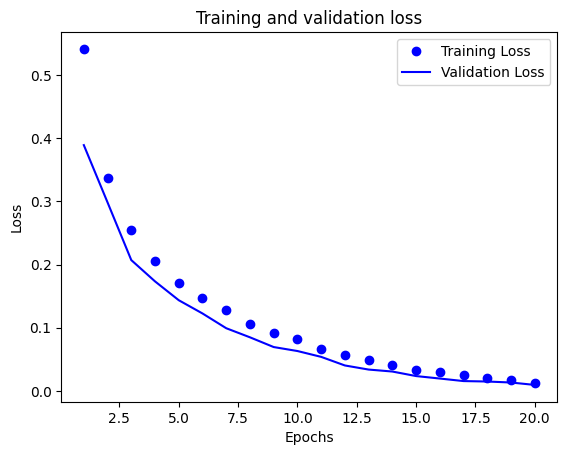

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values=history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1,len(loss_values)+1)
plt.plot(epochs,loss_values,"bo",label="Training Loss")
plt.plot(epochs,val_loss_values,"b",label="Validation Loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


7. Plotting training and validation accuracy

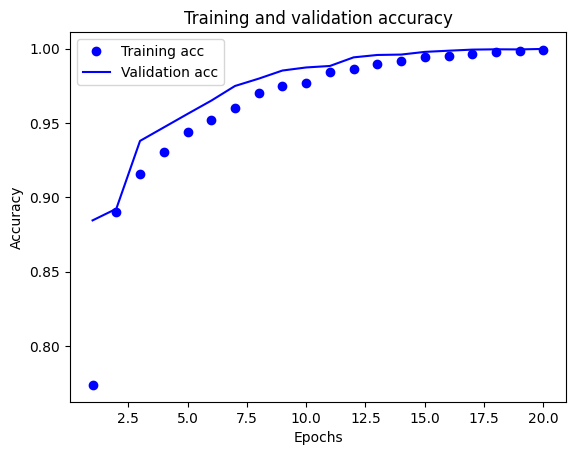

In [ ]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs,acc,"bo",label="Training acc")
plt.plot(epochs,val_acc,"b",label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()



As we can see, the training loss decreases with every epoch and the training accuracy increases with every epoch.

8. Using a trained model to generate predictions on new data

In [ ]:
model.predict(x_test)

782/782 [==============================] - 4s 5ms/step


array([[0.01416407],
       [0.99999875],
       [0.79407847],
       ...,
       [0.00166292],
       [0.00306988],
       [0.8281262 ]], dtype=float32)

The model is confident for some samples(0.999..) but not so confident for other samples (0.00166...).

9. Further experiments

Using different activation function, optimizer and loss function.

In [ ]:
rev_model = keras.Sequential([
    layers.Dense(16,activation="tanh"),
    layers.Dense(16,activation="tanh"),
    layers.Dense(1,activation="sigmoid")
])

In [ ]:
rev_model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

In [ ]:
rev_model.fit(x_train,y_train,epochs=5,batch_size=512)


Epoch 1/5
49/49 [==============================] - 2s 35ms/step - loss: 0.1587 - accuracy: 0.8088
Epoch 2/5
49/49 [==============================] - 2s 47ms/step - loss: 0.0866 - accuracy: 0.8944
Epoch 3/5
49/49 [==============================] - 3s 55ms/step - loss: 0.0665 - accuracy: 0.9151
Epoch 4/5
49/49 [==============================] - 2s 39ms/step - loss: 0.0549 - accuracy: 0.9322
Epoch 5/5
49/49 [==============================] - 2s 40ms/step - loss: 0.0479 - accuracy: 0.9415


In [ ]:
rev_results=rev_model.evaluate(x_test,y_test)

782/782 [==============================] - 3s 3ms/step - loss: 0.0911 - accuracy: 0.8776


In [ ]:
rev_results

[0.09114796668291092, 0.8776000142097473]